In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rupakroy_online_payments_fraud_detection_dataset_path = kagglehub.dataset_download('rupakroy/online-payments-fraud-detection-dataset')

print('Data source import complete.')

100%|██████████| 178M/178M [00:03<00:00, 60.1MB/s]

Extracting files...


Data source import complete.


# <font color='#F2622E'>ONLINE PAYMENTS FRAUD DETECTION

##  <font color='#F2622E'> Requirements

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## <font color='#F2622E'> Import Data

In [ ]:
df=pd.read_csv('/content/fraud.csv')

## <font color='#F2622E'> EDA (Exploratory Data Analysis)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Summary of numeric columns
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


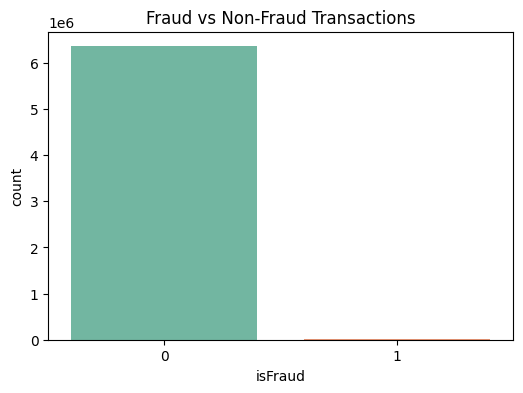

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for target variable
plt.figure(figsize=(6,4))
sns.countplot(x=df["isFraud"], palette="Set2")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


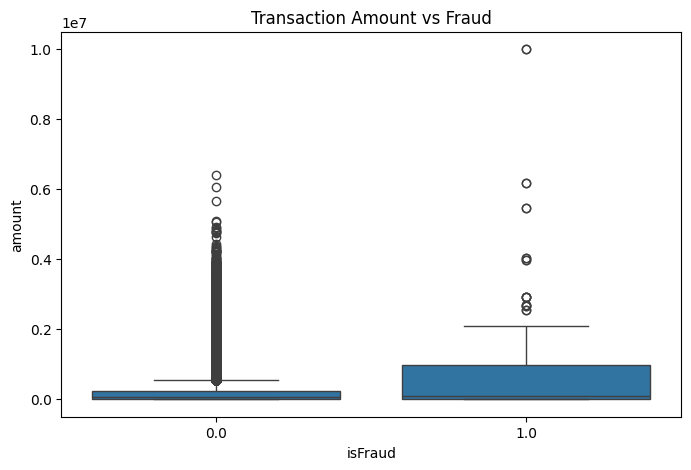

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["isFraud"], y=df["amount"])
plt.title("Transaction Amount vs Fraud")
plt.show()


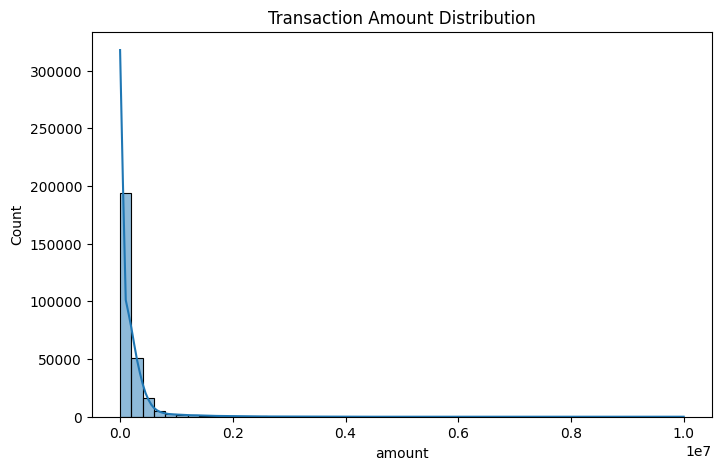

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


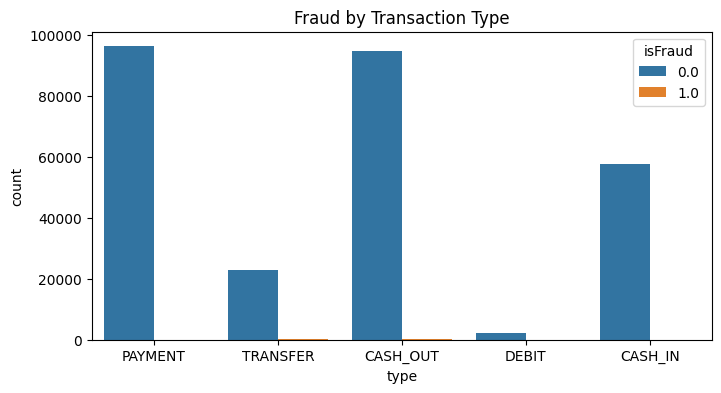

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["type"], hue=df["isFraud"])
plt.title("Fraud by Transaction Type")
plt.show()


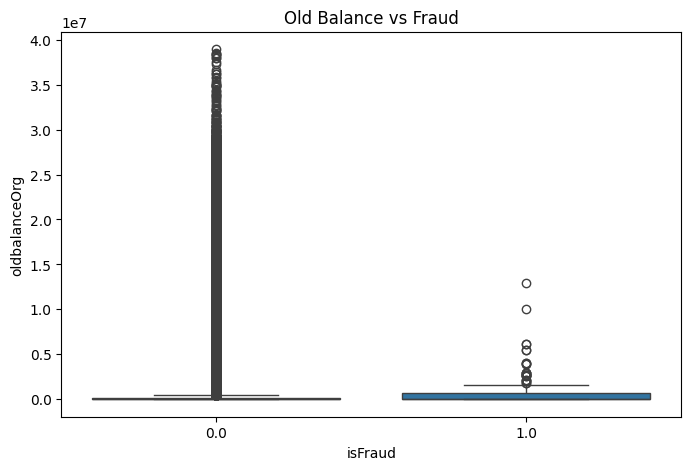

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["isFraud"], y=df["oldbalanceOrg"])
plt.title("Old Balance vs Fraud")
plt.show()


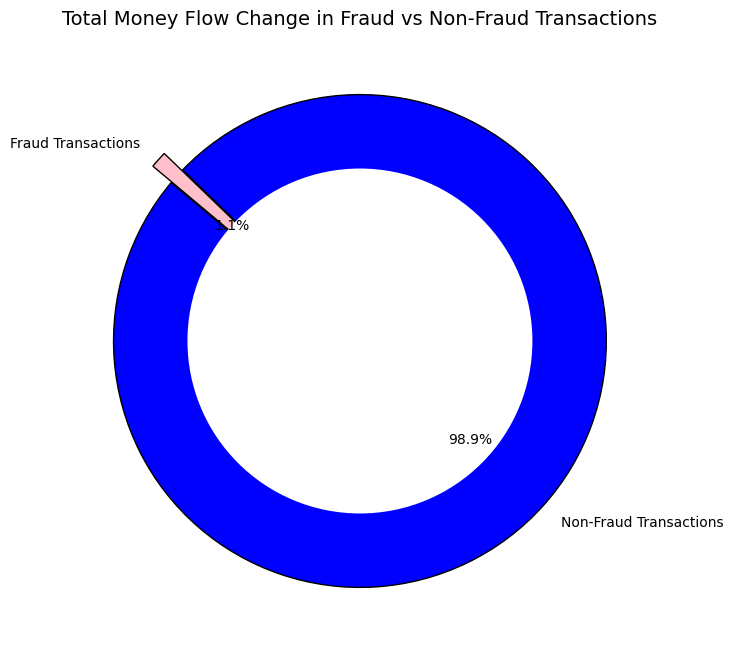

In [ ]:
import matplotlib.pyplot as plt

# Sample values (replace with your actual fraud and non-fraud money flow values)
fraud_money_flow = 100000  # Replace with actual fraud money flow
non_fraud_money_flow = 9000000  # Replace with actual non-fraud money flow

# Pie chart
plt.figure(figsize=(8, 8))
colors = ["blue", "pink"]  # Blue for Non-Fraud, Pink for Fraud
labels = ["Non-Fraud Transactions", "Fraud Transactions"]
sizes = [non_fraud_money_flow, fraud_money_flow]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140,
        explode=(0, 0.1), wedgeprops={'edgecolor': 'black'})

# Add a white circle in the middle to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gcf().gca().add_artist(centre_circle)

# Title
plt.title("Total Money Flow Change in Fraud vs Non-Fraud Transactions", fontsize=14)
plt.show()


## <font color='#F2622E'> Data Visualization

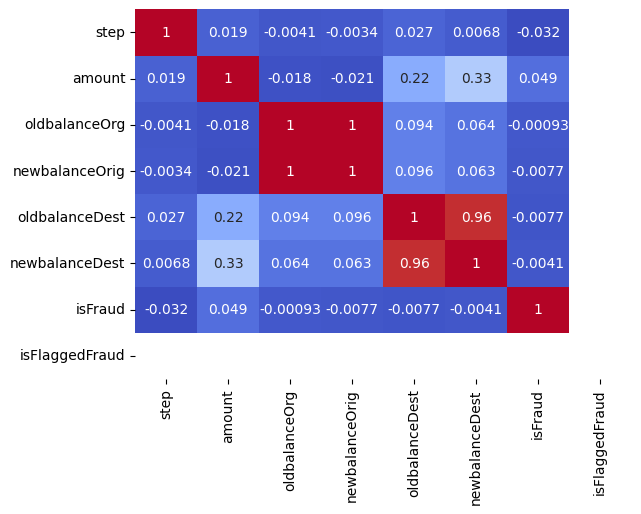

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',cbar=None);

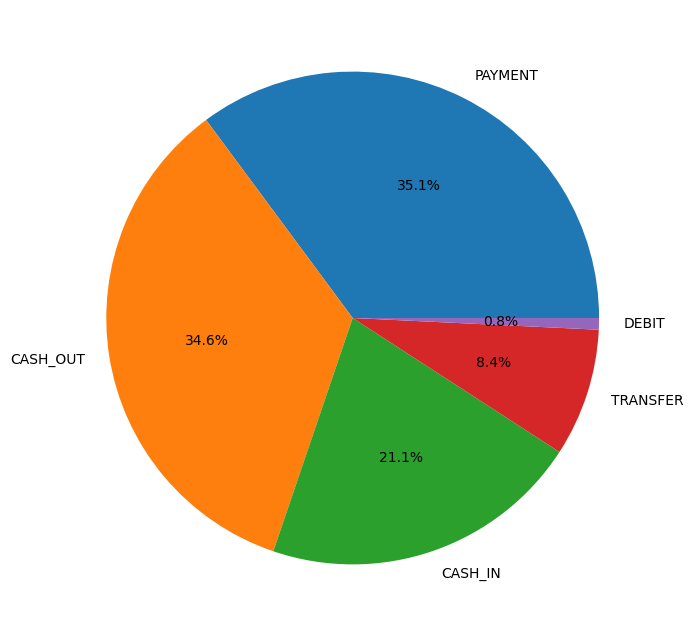

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(df['type'].value_counts(),
       labels=df['type'].value_counts().index,
       autopct='%1.1f%%');

## <font color='#F2622E'> Modelling with Conversational Methods

In [ ]:
x=df.drop(columns=['nameOrig','nameDest','isFraud','isFlaggedFraud'],axis=1)
y=df[['isFraud']]

In [ ]:
x.shape,y.shape

((6362620, 7), (6362620, 1))

In [ ]:
x=pd.get_dummies(x,drop_first=True)

**RANDOM FOREST CLASSIFIER**


🌲 Random Forest Accuracy: 0.8601

🌲 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92    163604
         1.0       0.00      0.94      0.01        94

    accuracy                           0.86    163698
   macro avg       0.50      0.90      0.47    163698
weighted avg       1.00      0.86      0.92    163698



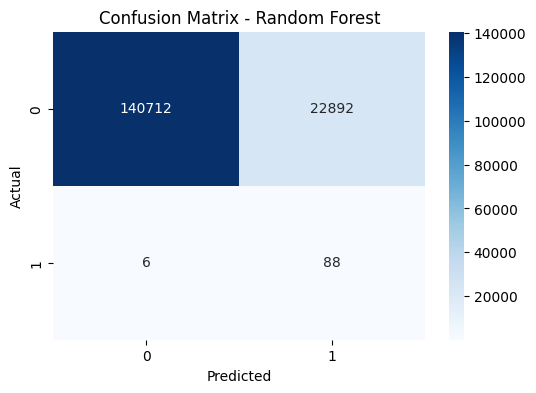

0.860120465735684

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# ✅ Function to train and evaluate Random Forest Model
def random_forest_model(x, y):
    # Ensure y is a Series (not DataFrame)
    if isinstance(y, pd.DataFrame):
        y = y.squeeze()

    # ✅ Handle missing values
    x = x.fillna(0)  # Replace NaNs in features
    if y.isnull().any():  # Replace NaNs in target
        mode_value = y.mode().iloc[0] if not y.mode().empty else y.dropna().sample(1).values[0]
        y = y.fillna(mode_value)

    # ✅ Encode categorical variables
    x = pd.get_dummies(x, drop_first=True)

    # ✅ Train-test split with stratification
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

    # ✅ Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)

    # ✅ Train Random Forest model with tuned hyperparameters
    model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    # ✅ Print accuracy
    acc = accuracy_score(y_test, predictions)
    print(f"\n🌲 Random Forest Accuracy: {acc:.4f}")

    # ✅ Print classification report
    print("\n🌲 Classification Report:")
    print(classification_report(y_test, predictions))

    # ✅ Confusion matrix
    conf_mat = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Random Forest")
    plt.show()

    return acc

# 🔹 Example Usage
# Ensure x and y are correctly defined before calling the function
random_forest_model(x, y)


**XGBoost**


🔹 XGBoost Accuracy: 0.8283

🔹 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91    163604
         1.0       0.00      0.95      0.01        94

    accuracy                           0.83    163698
   macro avg       0.50      0.89      0.46    163698
weighted avg       1.00      0.83      0.91    163698



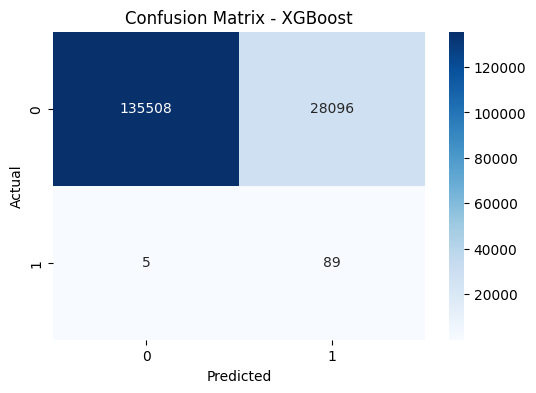

0.8283363266502951

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# ✅ Function to train and evaluate XGBoost Model
def xgboost_model(x, y):
    # Ensure y is a Series (not DataFrame)
    if isinstance(y, pd.DataFrame):
        y = y.squeeze()

    # ✅ Handle missing values
    x = x.fillna(0)  # Replace NaNs in features
    if y.isnull().any():  # Replace NaNs in target
        mode_value = y.mode().iloc[0] if not y.mode().empty else y.dropna().sample(1).values[0]
        y = y.fillna(mode_value)

    # ✅ Encode categorical variables
    x = pd.get_dummies(x, drop_first=True)

    # ✅ Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

    # ✅ Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)

    # ✅ Train XGBoost model with tuned hyperparameters
    model = XGBClassifier(n_estimators=10, max_depth=3, learning_rate=0.05,
                          use_label_encoder=False, eval_metric="logloss", reg_lambda=1)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    # ✅ Print accuracy
    acc = accuracy_score(y_test, predictions)
    print(f"\n🔹 XGBoost Accuracy: {acc:.4f}")

    # ✅ Print classification report
    print("\n🔹 Classification Report:")
    print(classification_report(y_test, predictions))

    # ✅ Confusion matrix
    conf_mat = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - XGBoost")
    plt.show()

    return acc

# 🔹 Example Usage
# Ensure x and y are correctly defined before calling the function
xgboost_model(x, y)

**LightGBM**

[LightGBM] [Info] Number of positive: 4151303, number of negative: 4151303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.486514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 8302606, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

⚡ LightGBM Accuracy: 0.9889

⚡ Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   1037826
         1.0       0.07      0.99      0.12       823

    accuracy                           0.99   1038649
   macro avg       0.53      0.99      0.56   1038649
weighted avg       1.00      0.99      0.99   1038649



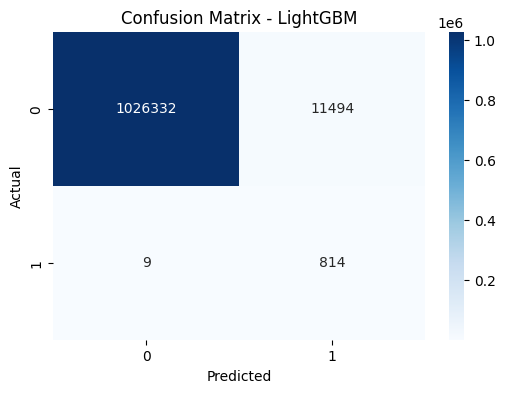

0.9889250362730817

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# ✅ Function to train and evaluate LightGBM Model
def lightgbm_model(x, y):
    # Ensure y is a Series (not DataFrame)
    if isinstance(y, pd.DataFrame):
        y = y.squeeze()

    # ✅ Handle missing values
    x = x.fillna(0)  # Replace NaNs in features
    if y.isnull().any():  # Replace NaNs in target
        mode_value = y.mode().iloc[0] if not y.mode().empty else y.dropna().sample(1).values[0]
        y = y.fillna(mode_value)

    # ✅ Encode categorical variables
    x = pd.get_dummies(x, drop_first=True)

    # ✅ Train-test split with stratification
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

    # ✅ Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)

    # ✅ Train LightGBM model with tuned hyperparameters
    model = LGBMClassifier(n_estimators=30, learning_rate=0.05, max_depth=10, random_state=42)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    # ✅ Print accuracy
    acc = accuracy_score(y_test, predictions)
    print(f"\n⚡ LightGBM Accuracy: {acc:.4f}")

    # ✅ Print classification report
    print("\n⚡ Classification Report:")
    print(classification_report(y_test, predictions))

    # ✅ Confusion matrix
    conf_mat = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - LightGBM")
    plt.show()

    return acc

# 🔹 Example Usage
# Ensure x and y are correctly defined before calling the function
lightgbm_model(x, y)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

## <font color='#F2622E'> Modelling with Deep Learning

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# ✅ Load & Prepare Data
df = df.dropna(subset=['isFraud'])  # Remove rows with NaN in y
x = df.drop(columns=['nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# ✅ Handle Missing and Infinite Values in x
x = x.replace([np.inf, -np.inf], np.nan)  # Convert inf to NaN
x = x.fillna(0)  # Fill NaN values

# ✅ Handle Missing Values in y
y = y.fillna(y.mode()[0])  # Replace NaN with the most common class
y = y.astype(int)  # ✅ Convert to integer

# ✅ One-Hot Encoding
x = pd.get_dummies(x, drop_first=True)

# ✅ Handle Class Imbalance Using SMOTE
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y.squeeze())  # ✅ y is now 1D and clean

# ✅ Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ✅ Build Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')  # ✅ Binary classification
])

# ✅ Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Train Model
history = model.fit(x_train, y_train, epochs=3, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

# ✅ Predictions
predictions = (model.predict(x_test) > 0.5).astype(int)  # ✅ Convert probabilities to binary

# ✅ Evaluation
print("\n🔹 Accuracy:", accuracy_score(y_test, predictions))
print("\n🔹 Classification Report:\n", classification_report(y_test, predictions))


Epoch 1/3
32721/32721 ━━━━━━━━━━━━━━━━━━━━ 104s 3ms/step - accuracy: 0.7574 - loss: 2034.8833 - val_accuracy: 0.7479 - val_loss: 0.5309
Epoch 2/3
32721/32721 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - accuracy: 0.7492 - loss: 0.7078 - val_accuracy: 0.7542 - val_loss: 0.4782
Epoch 3/3
32721/32721 ━━━━━━━━━━━━━━━━━━━━ 95s 3ms/step - accuracy: 0.7683 - loss: 0.5565 - val_accuracy: 0.8339 - val_loss: 0.4060
10226/10226 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step

🔹 Accuracy: 0.8364771032493094

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81    162930
           1       0.77      0.97      0.86    164278

    accuracy                           0.84    327208
   macro avg       0.86      0.84      0.83    327208
weighted avg       0.86      0.84      0.83    327208



[LightGBM] [Info] Number of positive: 654414, number of negative: 654414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 1308828, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

⚡ LightGBM Accuracy: 0.9803

⚡ Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    163604
           1       0.98      0.98      0.98    163604

    accuracy                           0.98    327208
   macro avg       0.98      0.98      0.98    327208
weighted avg       0.98      0.98      0.98    327208



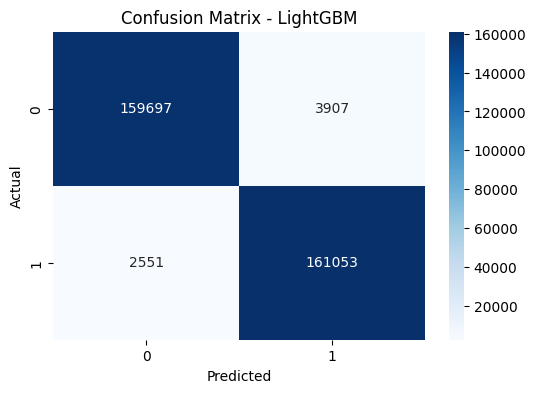

Enter transaction type (e.g., CASH_IN, CASH_OUT, PAYMENT, TRANSFER): TRANSFER
Enter amount: 181
Enter old balance of origin: 181
Enter new balance of origin: 0
Enter old balance of destination: 0
Enter new balance of destination: 0

🚨 Prediction: FRAUDULENT TRANSACTION! 🚨


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # Import for saving/loading the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# ✅ Function to train and save LightGBM model
def train_lightgbm_model(x, y):
    if isinstance(y, pd.DataFrame):
        y = y.squeeze()

    # ✅ Drop non-relevant columns
    x = x.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], errors='ignore')
    x = x.fillna(0)

    # ✅ One-hot encoding
    x = pd.get_dummies(x, drop_first=True)

    # ✅ Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

    # ✅ Handle class imbalance
    smote = SMOTE(random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)

    # ✅ Train LightGBM
    model = LGBMClassifier(n_estimators=30, learning_rate=0.05, max_depth=10, random_state=42)
    model.fit(x_train, y_train)

    # ✅ Save model & feature names
    with open('lightgbm_model.pkl', 'wb') as file:
        pickle.dump((model, list(x_train.columns)), file)  # Save feature names too

    # ✅ Model Evaluation
    predictions = model.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    print(f"\n⚡ LightGBM Accuracy: {acc:.4f}")
    print("\n⚡ Classification Report:")
    print(classification_report(y_test, predictions))

    # ✅ Confusion matrix
    conf_mat = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - LightGBM")
    plt.show()

# ✅ Function to load model & predict
def predict_user_input():
    with open('lightgbm_model.pkl', 'rb') as file:
        model, feature_names = pickle.load(file)  # Load model and features

    # ✅ Get user input
    user_input = {
        "type": input("Enter transaction type (e.g., CASH_IN, CASH_OUT, PAYMENT, TRANSFER): ").upper(),
        "amount": float(input("Enter amount: ")),
        "oldbalanceOrg": float(input("Enter old balance of origin: ")),
        "newbalanceOrig": float(input("Enter new balance of origin: ")),
        "oldbalanceDest": float(input("Enter old balance of destination: ")),
        "newbalanceDest": float(input("Enter new balance of destination: "))
    }

    # ✅ Convert user input to DataFrame
    input_df = pd.DataFrame([user_input])

    # ✅ One-hot encode input
    input_df = pd.get_dummies(input_df)

    # ✅ Add missing columns with default values (0)
    for col in feature_names:
        if col not in input_df.columns:
            input_df[col] = 0

    # ✅ Ensure column order matches model
    input_df = input_df[feature_names]

    # ✅ Make prediction
    prediction = model.predict(input_df)[0]

    # ✅ Display result
    if prediction == 1:
        print("\n🚨 Prediction: FRAUDULENT TRANSACTION! 🚨")
    else:
        print("\n✅ Prediction: LEGITIMATE TRANSACTION.")

# 🔹 Train Model (Ensure x and y are defined)
train_lightgbm_model(x, y)

# 🔹 Get User Input and Predict
predict_user_input()


In [ ]:
from google.colab import files
files.download('lightgbm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>